In [76]:
import json
import os
import sys
import matplotlib.pyplot as plt


Matplotlib is building the font cache; this may take a moment.


In [77]:
def load_file(path, file: str):
    # print(path + file)
    with open(path + file, 'r') as f:
        return json.load(f)

def load(file: str):
    return list(map(lambda x: load_file(file + '/', x), os.listdir(file)))


In [78]:
data = load('./alexnet-int8')

In [79]:
# data['file']['step']['kernels']
print(len(data[0][0]))
# print(len(data[1][0]['step']))
print(data[0][2]['step'])
print(data[0][0]['kernels'][0]['layer_name'])
print(data[0][0]['total_inference'])
print(data[0][0].keys())

6
100
NeonPadWorkload_Execute
716.11005
dict_keys(['blackbox', 'compute_inference', 'kernels', 'search_inference', 'step', 'total_inference'])


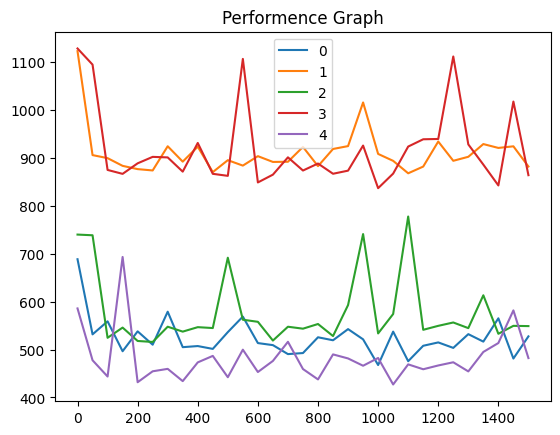

In [100]:
# 어떤 정보를 추출할 것인가?
# 시간의 지남에 따른, log 성능 출력
# 그리고 그림 그려야지!
# print(data[0][1]['kernels'][0].keys())
# print(data[0][1]['kernels'][0]['core'])

def get_file_to_inference_times(file):
    # print(data[0][3]['compute_inference'])
    return list(map(lambda x: x['compute_inference'], file))
def draw_inference_times(steps):
    plt.plot(range(0, 1501, 50), steps)
for idx in range(len(data)):
    steps = get_file_to_inference_times(data[idx])
    draw_inference_times(steps)

plt.legend(list(range(len(data))))
plt.title("Performence Graph")
plt.show()

In [ ]:
# 시간의 지남에 따른, log 성능 출력
# 그리고 그림 그려야지!
# 